# Week 10 handin - by Sebastian Bentley (cph-sb287)

## Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
![image.png](attachment:image.png)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

## 02 status

## 03 solution part 1

In [1]:
#load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 Petal columns. Now we are left with a 2D feature space
import pandas as pd
data = "../data/iris_data.csv"
df = pd.read_csv(data, decimal=',')
df.drop(['Petal length','Petal width'],'columns',inplace=True)
df


,Sepal length,Sepal width,Species
0,5.1,3.5,I. setosa
1,4.9,3.0,I. setosa
2,4.7,3.2,I. setosa
3,4.6,3.1,I. setosa
4,5.0,3.6,I. setosa
...,...,...,...
145,6.7,3.0,I. virginica
146,6.3,2.5,I. virginica
147,6.5,3.0,I. virginica
148,6.2,3.4,I. virginica


In [2]:
#get unique labels (Species column)
from sklearn import preprocessing
from sklearn.cluster import MeanShift
import numpy as np

unique = np.unique(df["Species"])

unique

array(['I. setosa', 'I. versicolor', 'I. virginica'], dtype=object)

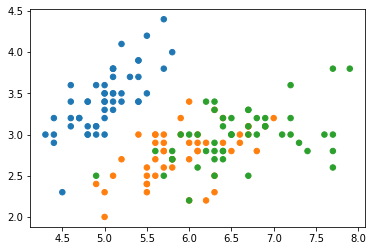

In [3]:
#plot with a scatter plot each iris flower sample colored by label (3 different colors)
import matplotlib.pyplot as plt

plt.figure()

for u in unique:
    plt.scatter(x=df["Sepal length"], y=df["Sepal width"],s=(df["Species"] == u)*30)



In [4]:
#This is needed for the next exercise
df.drop(['Species'],'columns',inplace=True)

In [19]:
#use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result)

from sklearn.cluster import estimate_bandwidth


es_bandwidth = estimate_bandwidth(df, quantile=0.15)
print("estimated bandwith: " + str(es_bandwidth))

from sklearn.cluster import MeanShift
analyzer = MeanShift(es_bandwidth) 
analyzer.fit(df)
labels = analyzer.labels_
cluster_centers = analyzer.cluster_centers_
n_clusters = len(np.unique(labels))

#print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
print('labels:\n', labels)
print('\n\nCluster centers:\n', cluster_centers)
print('\n\nnumber of clusters:', n_clusters)


estimated bandwith: 0.4782250984532596
labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 1 1 1 1 1 1 1 1 2 0 2 3 0 0 0 3 0 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0
 0 0 2 0 0 0 3 3 0 0 1 0 0 0 0 3 3 0 0 3 0 0 0 0 3 0 0 0 2 0 0 2 3 2 0 4 0
 0 2 0 0 0 0 4 2 0 2 0 2 0 0 2 0 0 0 2 2 4 0 0 0 2 0 0 0 2 0 2 0 2 0 0 0 0
 0 0]


Cluster centers:
 [[6.15333333 2.88666667]
 [4.96388889 3.375     ]
 [7.43333333 2.92222222]
 [4.94285714 2.38571429]
 [7.8        3.8       ]]


number of clusters: 5


Text(0.5, 1.0, 'Estimated number of clusters: 5')

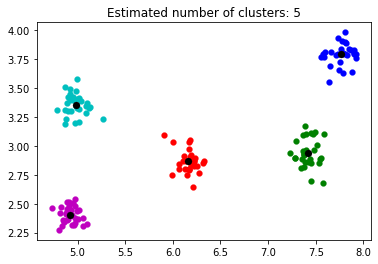

In [20]:
#create a new scatter plot where each flower is colored according to cluster label
from itertools import cycle
from sklearn.datasets import make_blobs

data_2d, _ = make_blobs(n_samples=len(df), centers=cluster_centers, cluster_std=0.1)

analyzer.fit(data_2d)
labels = analyzer.labels_
cluster_centers = analyzer.cluster_centers_
n_clusters = len(np.unique(labels))

# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    #add a dot for the cluster centers
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))

In [11]:
#Compare the 2 plots (colored by actual labels vs. colored by cluster label)
#As seen on the plots, the actual labels can be grouped in three clusters.
#Looking at the values, you can see that the three colors fit with the three clusters.


In [ ]:
#Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.
#now, there are two more clusters!
